In [36]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data=sns.load_dataset('flights')
data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('month',axis=1),data['month'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((100, 2), (44, 2))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:
scaler.mean_

array([1954.56,  280.82])

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [13]:
np.round(x_train.describe(),1)

,year,passengers
count,100.0,100.0
mean,1954.6,280.8
std,3.5,118.0
min,1949.0,112.0
25%,1951.8,180.8
50%,1955.0,270.0
75%,1957.0,356.8
max,1960.0,622.0


In [14]:
np.round(x_train_scaled.describe(),1)

,year,passengers
count,100.0,100.0
mean,0.0,0.0
std,1.0,1.0
min,-1.6,-1.4
25%,-0.8,-0.9
50%,0.1,-0.1
75%,0.7,0.6
max,1.6,2.9


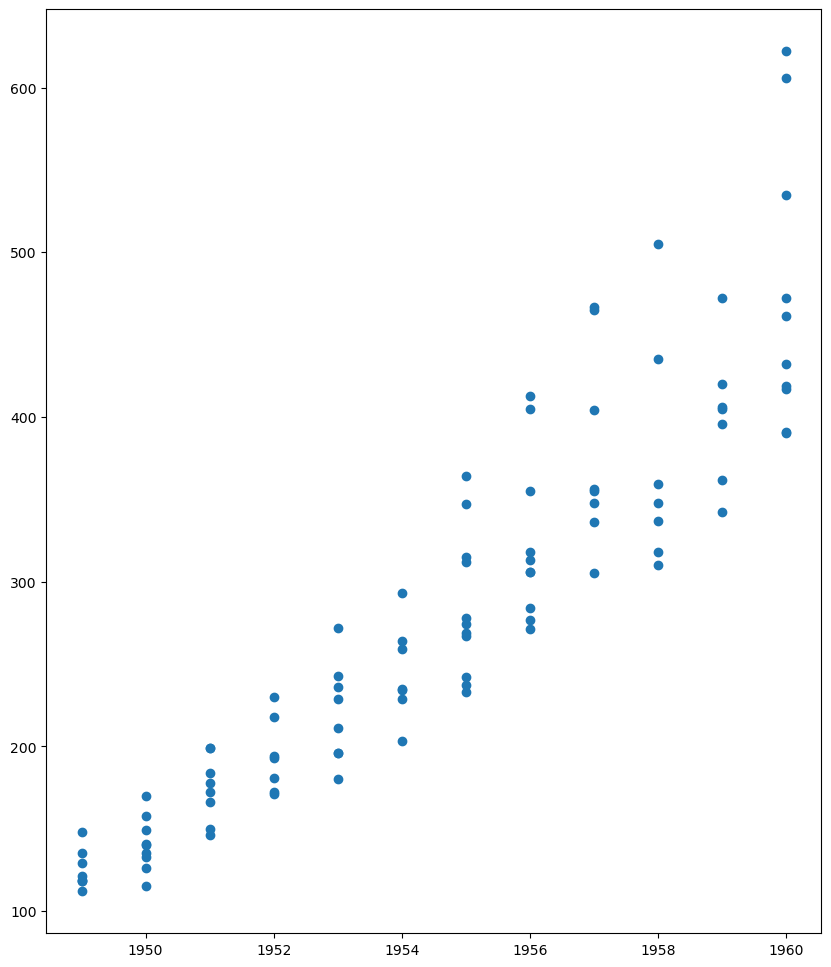

In [15]:
plt.figure(figsize=(10,12))
plt.scatter(x_train['year'],x_train['passengers'])
plt.show()

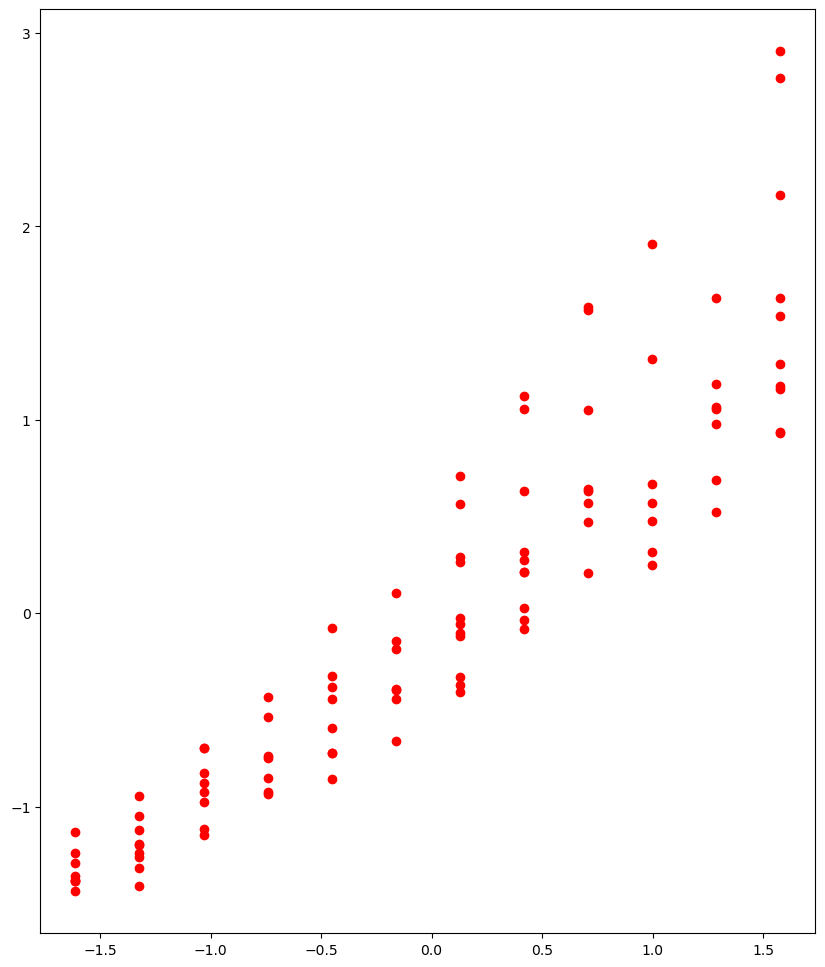

In [38]:
plt.figure(figsize=(10,12))
plt.scatter(x_train_scaled['year'],x_train_scaled['passengers'],color='r')
plt.show()

<AxesSubplot:xlabel='year', ylabel='Density'>

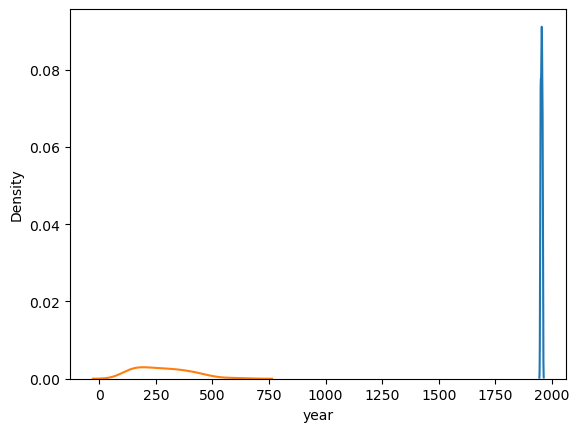

In [17]:
sns.kdeplot(x_train['year'])
sns.kdeplot(x_train['passengers'])

<AxesSubplot:xlabel='year', ylabel='Density'>

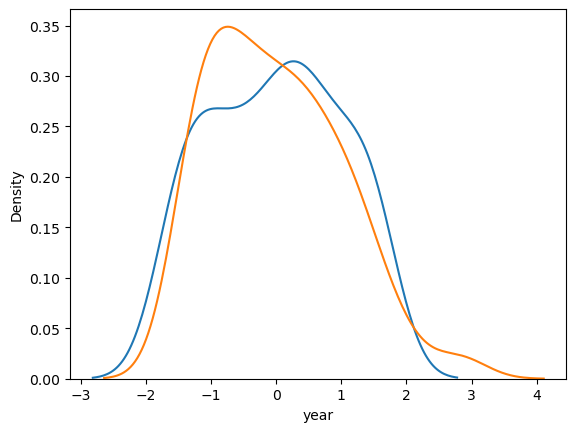

In [18]:
sns.kdeplot(x_train_scaled['year'])
sns.kdeplot(x_train_scaled['passengers'])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [21]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_test,y_test)

LogisticRegression()

In [22]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('actual',accuracy_score(y_test,y_pred))
print('scaled',accuracy_score(y_test,y_pred_scaled))

actual 0.06818181818181818
scaled 0.09090909090909091


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc=DecisionTreeClassifier()
dtc_scaled=DecisionTreeClassifier()

In [27]:
dtc.fit(x_train,y_train)
dtc_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
p_predict=dtc.predict(x_test)
p_predict_scaled=dtc_scaled.predict(x_test_scaled)

In [30]:
print('actual',accuracy_score(y_test,p_predict))
print('scaled',accuracy_score(y_test,p_predict_scaled))

actual 0.0
scaled 0.0


In [32]:
data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000
